<h1>Predição da Resistência à Compressão do Concreto</h1>
    <p>Neste projeto, vamos analisar o dataset "Concrete Compressive Strength" do UCI Machine Learning Repository para entender os fatores que influenciam a resistência à compressão do concreto e construir um modelo de regressão linear múltipla para prever essa resistência.</p>

## Capítulo 1: O Desafio da Construção Civil

Imagine um engenheiro civil encarregado de projetar um edifício que deve suportar condições extremas, como terremotos ou ventos fortes. A resistência do concreto, um dos materiais mais utilizados na construção, é um fator crucial para garantir a segurança e a durabilidade dessas estruturas. No entanto, prever essa resistência com precisão é um desafio, pois ela depende de uma combinação complexa de materiais e condições de cura.

Foi nesse contexto que surgiu a ideia deste projeto: usar dados históricos e algoritmos de machine learning para prever a resistência à compressão do concreto. Com isso, engenheiros poderiam tomar decisões mais informadas e reduzir os riscos associados a falhas estruturais.

## Objetivos do Projeto

- Realizar a importação e limpeza dos dados.
- Explorar os dados através de visualizações e estatísticas descritivas.
- Analisar as correlações entre variáveis.
- Construir e validar um modelo de regressão linear múltipla.
- Interpretar os resultados e extrair insights para a engenharia civil.

<h2>Importação das Bibliotecas</h2>

Utilizaremos as bibliotecas Pandas, Numpy, Matplotlib, Seaborn e Scikit-Learn.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Configurando o estilo dos gráficos para melhor visualização
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)


## Capítulo 2: Explorando os Dados

O primeiro passo foi explorar o dataset "Concrete Compressive Strength", disponível no UCI Machine Learning Repository. Este conjunto de dados contém informações sobre a composição do concreto, como a quantidade de cimento, escória, cinza volante, água, superplastificante, agregados e a idade do concreto, além da resistência à compressão.

A análise exploratória de dados (EDA) é o primeiro passo para entender a distribuição e as relações entre as variáveis do dataset.



In [2]:
# Importação das bibliotecas necessárias
import pandas as pd

# Carregando o dataset real do concreto
df = pd.read_excel("Concrete_Data.xls")

# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())

# Visualizando as colunas do dataset
print("Colunas do dataset:")
print(df.columns)

# Verificando valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Visualizando estatísticas descritivas do dataset
print("Estatísticas descritivas do dataset:")
print(df.describe())

# Renomeando as colunas para facilitar a leitura (opcional)
df.columns = ['Cimento', 'Escória', 'Cinza_Voadora', 'Água', 'Superplastificante', 'Agregado_Miúdo', 'Agregado_Graúdo', 'Idade', 'Resistência']

# Visualizando as primeiras linhas do dataset com colunas renomeadas
print("Primeiras linhas do dataset com colunas renomeadas:")
print(df.head())

Primeiras linhas do dataset:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg

Valores nulos por coluna:
Cimento               0
Escória               0
Cinza_Voadora         0
Água                  0
Superplastificante    0
Agregado_Miúdo        0
Agregado_Graúdo       0
Idade                 0
Resistência           0
dtype: int64
           Cimento      Escória  Cinza_Voadora         Água  \
count  1030.000000  1030.000000    1030.000000  1030.000000   
mean    281.165631    73.895485      54.187136   181.566359   
std     104.507142    86.279104      63.996469    21.355567   
min     102.000000     0.000000       0.000000   121.750000   
25%     192.375000     0.000000       0.000000   164.900000   
50%     272.900000    22.000000       0.000000   185.000000   
75%     350.000000   142.950000     118.270000   192.000000   
max     540.000000   359.400000     200.100000   247.000000   

       Superplastificante  Agregado_Miúdo  Agregado_Graúdo        Idade  \
count         1030.000000     1030.000000      1030.000000  1030.000000   
mean             6.203112  

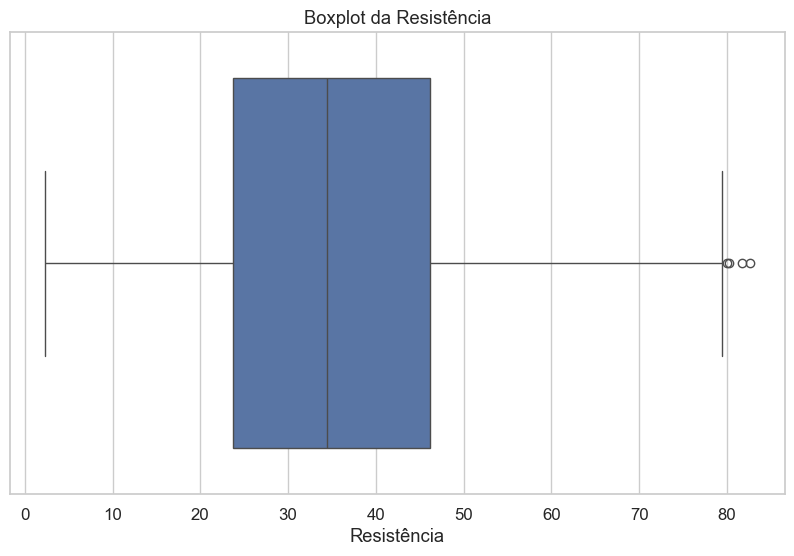


Dimensões do dataset: (1030, 9)


In [3]:
# Verificando valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Análise exploratória inicial
print(df.describe())  # Estatísticas descritivas
print(df.info())  # Informações gerais sobre os dados

# Verificando a presença de outliers nas variáveis contínuas
sns.boxplot(data=df, x='Resistência')
plt.title('Boxplot da Resistência')
plt.show()

# Dimensões do dataset
print("\nDimensões do dataset:", df.shape)


Aqui iremos identificar os outliers para análise

In [4]:
# Calcular o IQR
Q1 = df['Resistência'].quantile(0.25)
Q3 = df['Resistência'].quantile(0.75)
IQR = Q3 - Q1

# Limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Resistência'] < limite_inferior) | (df['Resistência'] > limite_superior)]
print("Outliers encontrados:")
print(outliers)

Outliers encontrados:
     Cimento  Escória  Cinza_Voadora   Água  Superplastificante  \
0      540.0      0.0            0.0  162.0                 2.5   
153    323.7    282.8            0.0  183.8                10.3   
181    389.9    189.0            0.0  145.9                22.0   
381    315.0    137.0            0.0  145.0                 5.9   

     Agregado_Miúdo  Agregado_Graúdo  Idade  Resistência  
0            1040.0            676.0     28    79.986111  
153           942.7            659.9     56    80.199848  
181           944.7            755.8     91    82.599225  
381          1130.0            745.0     28    81.751169  


São poucas amostras outliers porém com valores reais e plausíveis. Por representarem casos extremos, serão substituídos pelos valores do limite superior, reduzindo seu impacto no modelo.

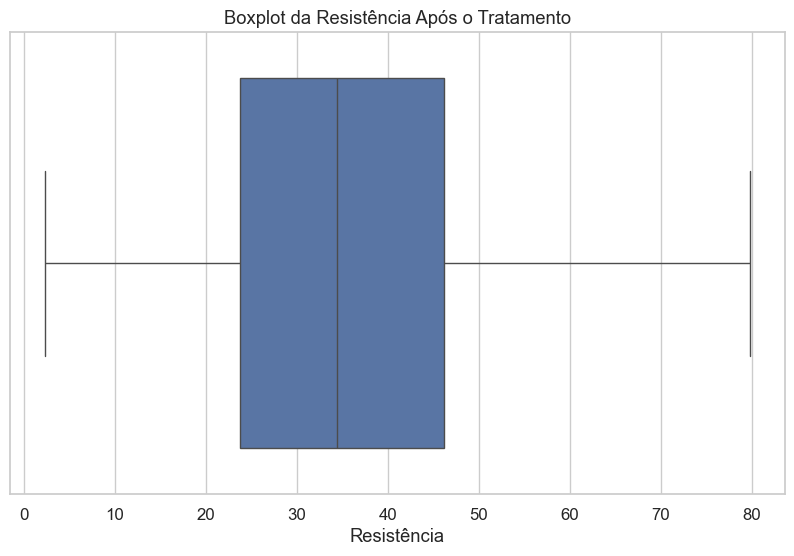

In [5]:
# Substituir outliers pelos limites
df['Resistência'] = np.where(df['Resistência'] < limite_inferior, limite_inferior, df['Resistência'])
df['Resistência'] = np.where(df['Resistência'] > limite_superior, limite_superior, df['Resistência'])

sns.boxplot(data=df, x='Resistência')
plt.title('Boxplot da Resistência Após o Tratamento')
plt.show()

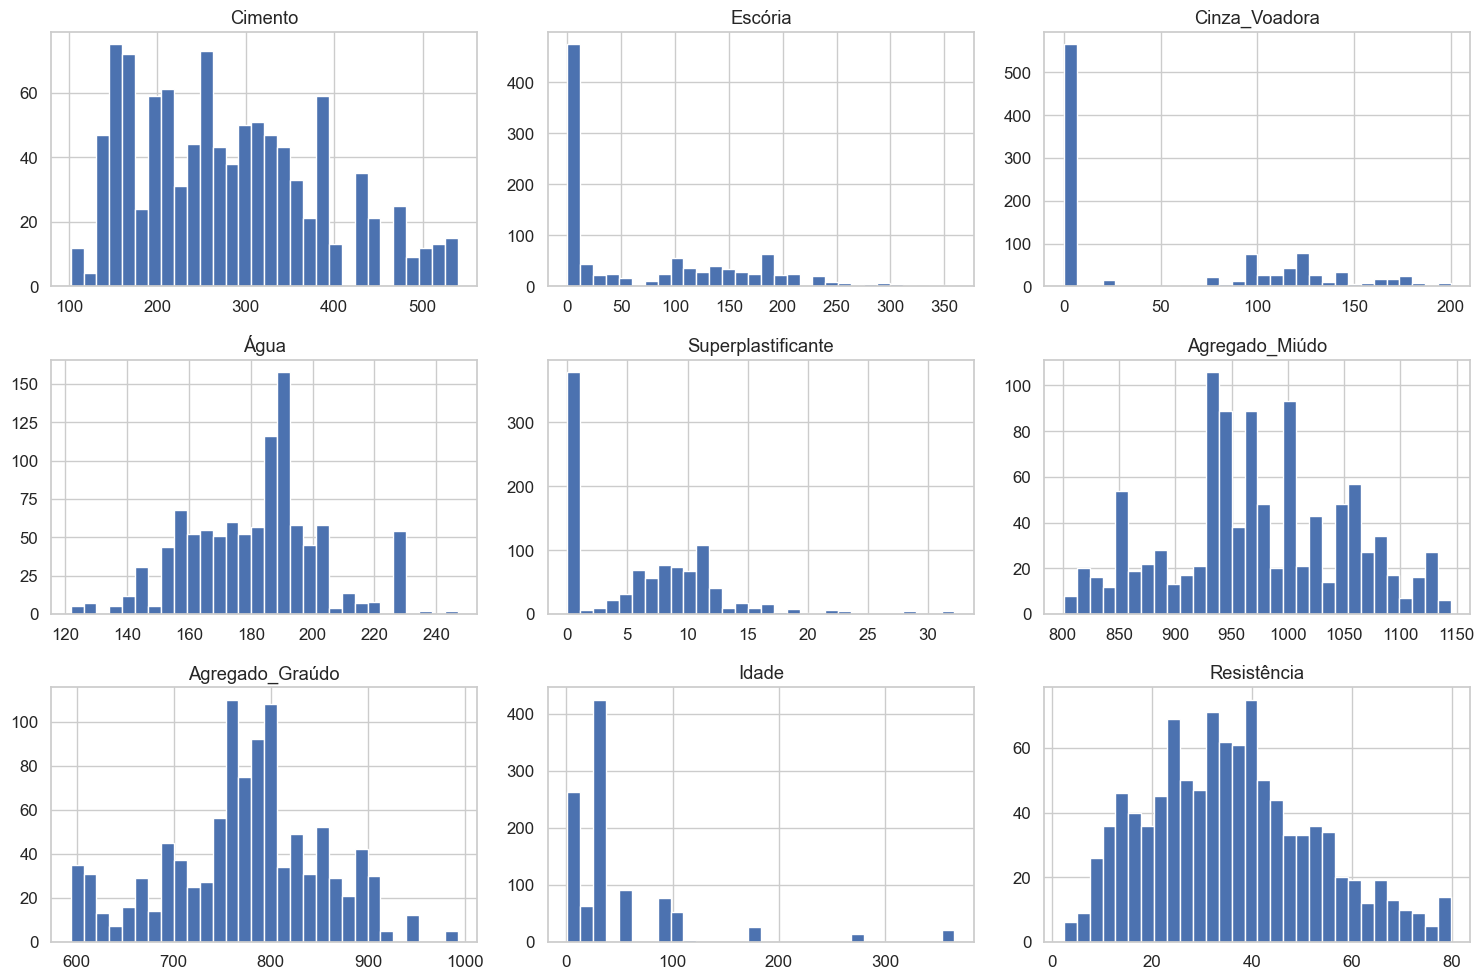

In [6]:
# Visualizar a distribuição das variáveis
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

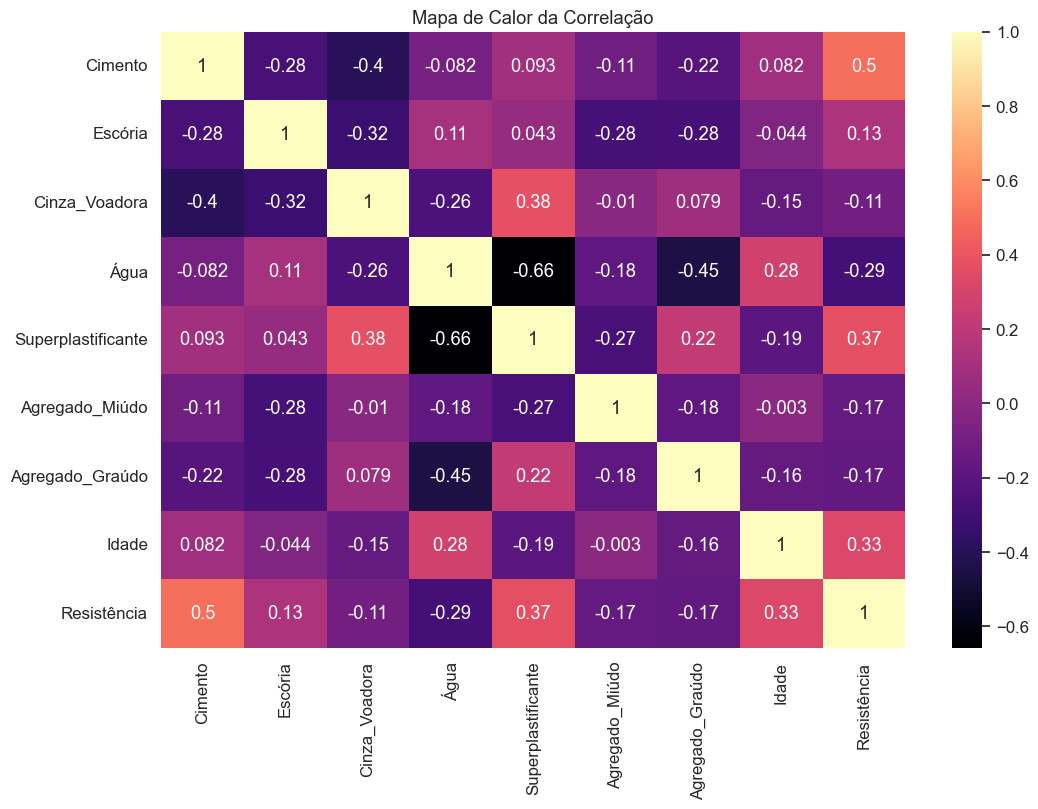

In [7]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Analisar a correlação entre as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title('Mapa de Calor da Correlação')
plt.show()


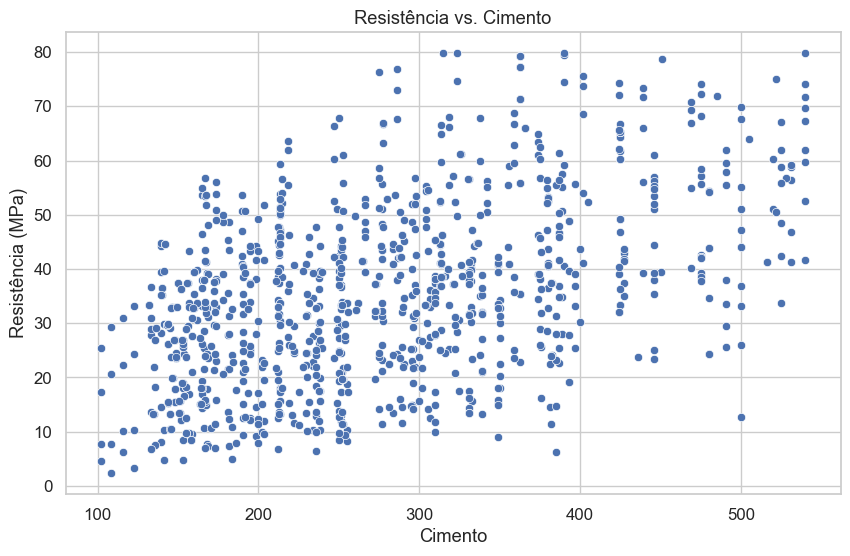

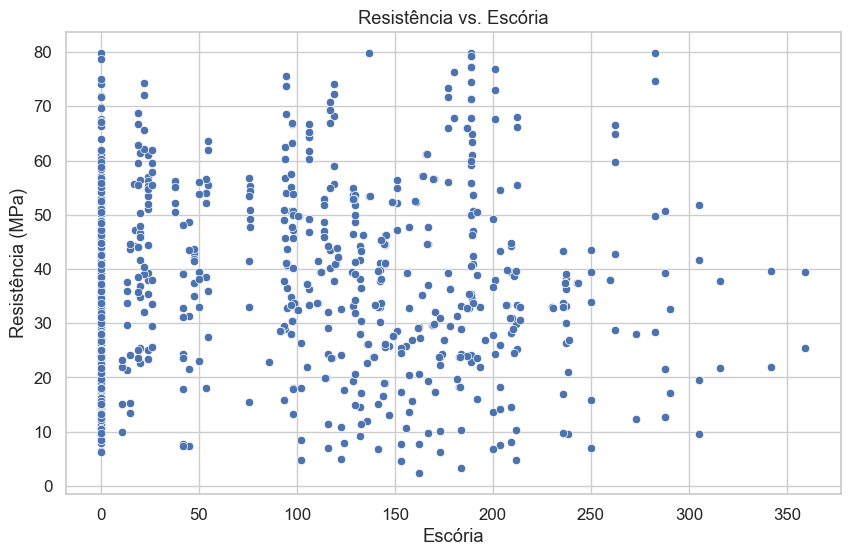

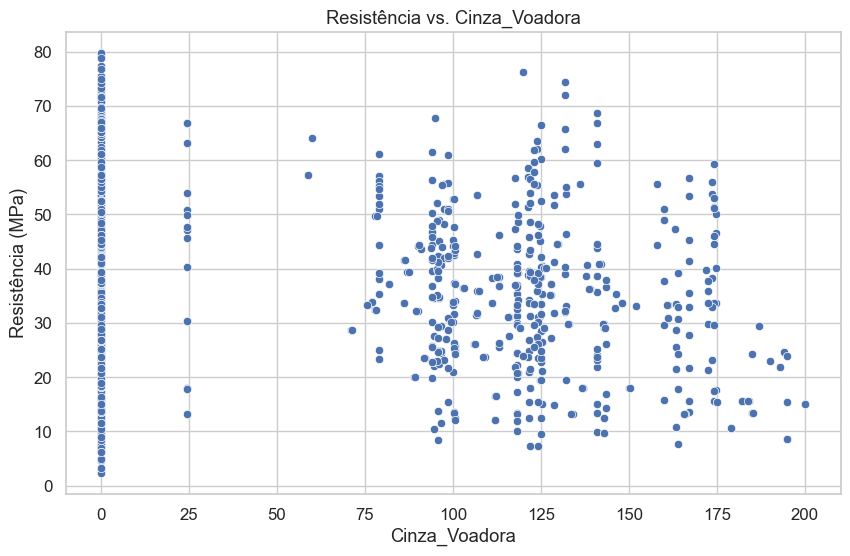

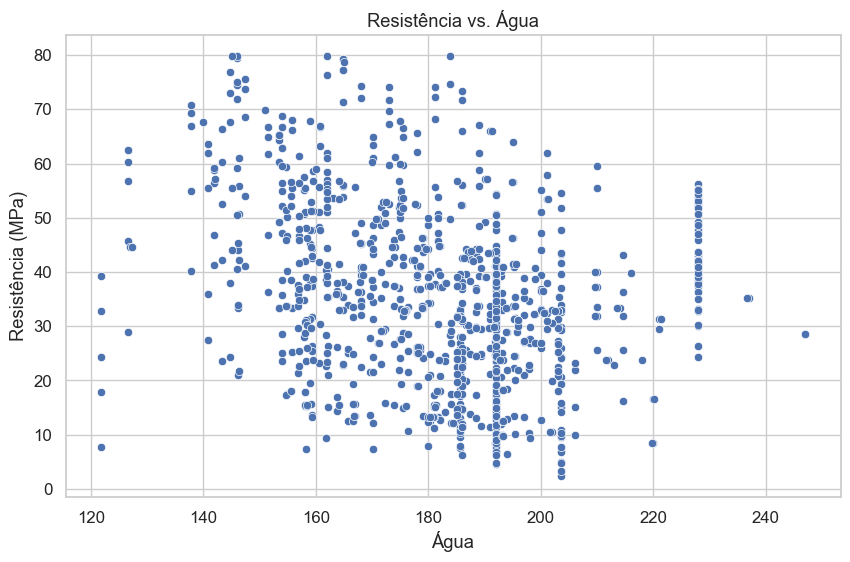

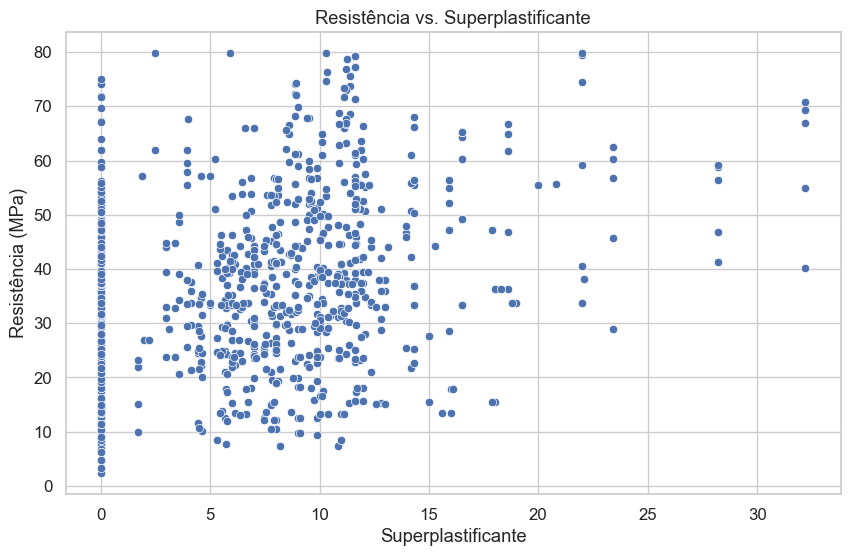

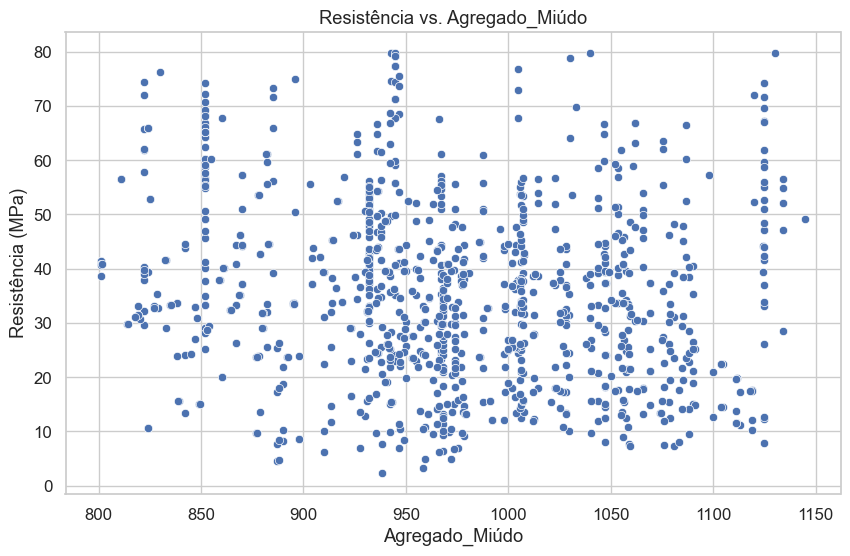

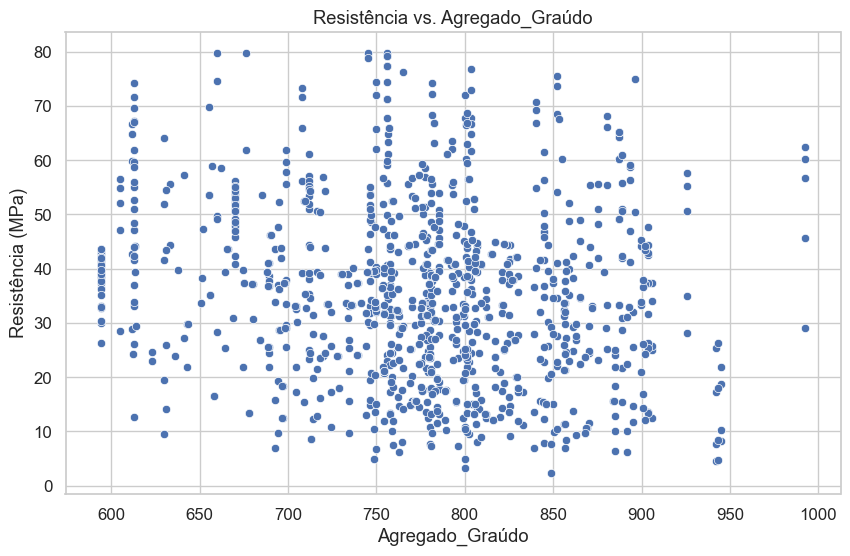

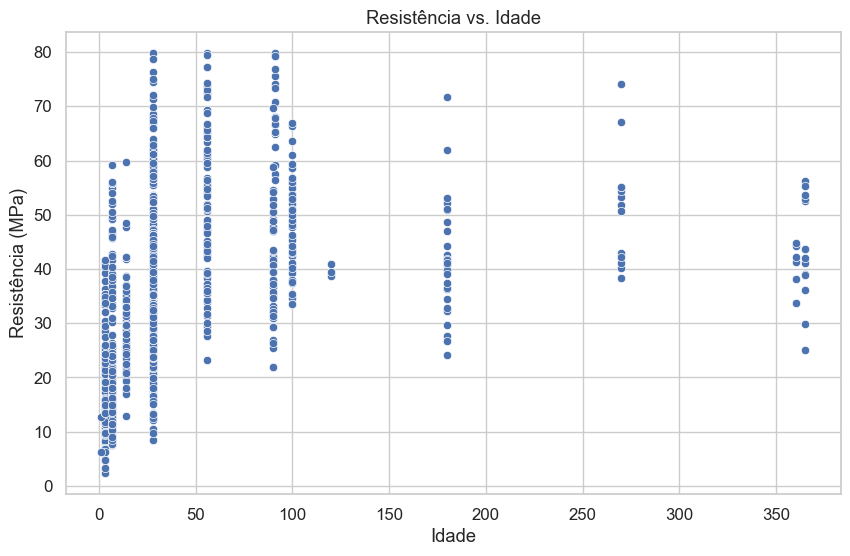

In [8]:
# Visualização dos dados
variaveis = [
'Cimento', 'Escória', 'Cinza_Voadora', 'Água', 'Superplastificante', 'Agregado_Miúdo', 'Agregado_Graúdo', 'Idade'
]

target = 'Resistência'

for var in variaveis:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y=target, data=df)
    plt.title(f"Resistência vs. {var}")
    plt.xlabel(var)
    plt.ylabel("Resistência (MPa)")
    plt.show()

Durante a análise exploratória, descobrimos padrões interessantes:

Variáveis como a quantidade de cimento e a idade do concreto mostraram forte correlação com a resistência.
Outliers foram identificados e tratados para garantir que o modelo fosse robusto.
Visualizações, como histogramas e mapas de calor, ajudaram a entender as relações entre as variáveis.

## Capítulo 3: Construindo o Modelo

Com os dados limpos e prontos, partimos para a construção dos modelos preditivos. Testamos três algoritmos:

Regressão Linear: Simples, mas eficaz para identificar relações lineares.

Random Forest: Um modelo baseado em árvores de decisão, capaz de capturar interações complexas entre variáveis.

Gradient Boosting: Um modelo avançado que combina várias árvores de decisão para melhorar a precisão.

In [9]:
# Pré-processamento de Dados
# Separar as features e a variável alvo
X = df.drop(columns=['Resistência'])
y = df['Resistência']

# Normalizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construção e Avaliação do Modelo
# Testar diferentes algoritmos de machine learning
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Avaliar o desempenho dos modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R²: {r2:.2f}')


Linear Regression - MSE: 95.96, R²: 0.63
Random Forest - MSE: 30.53, R²: 0.88
Gradient Boosting - MSE: 29.85, R²: 0.88


Após treinar e avaliar os modelos, o Gradient Boosting se destacou como o melhor, apresentando o menor erro médio quadrático (MSE) e o maior coeficiente de determinação (R²).

## Capítulo 4: Validação e Robustez

Para garantir que o modelo não estava superajustado aos dados de treino, utilizamos validação cruzada com KFold. Dividimos os dados em 5 partes e avaliamos o desempenho do modelo em cada uma delas. Os resultados mostraram que o Gradient Boosting era consistente e generalizava bem para novos dados.

Além disso, comparamos os resultados da validação cruzada com os do conjunto de teste simples. A proximidade entre os valores confirmou a robustez do modelo.

In [13]:
# Validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    print(f'{name} - Validação Cruzada (R² por fold): {cv_scores}')
    print(f'{name} - Média do R²: {np.mean(cv_scores):.2f}')


# MAE - Mean Absolute Error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f} MPa')



Linear Regression - Validação Cruzada (R² por fold): [0.60987523 0.6252556  0.50500024 0.60872103 0.63759531]
Linear Regression - Média do R²: 0.60
Random Forest - Validação Cruzada (R² por fold): [0.91305939 0.89474298 0.86436981 0.906999   0.91095879]
Random Forest - Média do R²: 0.90
Gradient Boosting - Validação Cruzada (R² por fold): [0.90764562 0.88139628 0.85863437 0.89741463 0.91546179]
Gradient Boosting - Média do R²: 0.89
MAE: 4.06 MPa


Também utilizamos o MAE (Mean Absolute Error) como uma métrica complementar.

O Mean Absolute Error (MAE), ou Erro Médio Absoluto, é uma métrica que mede a média das diferenças absolutas entre os valores reais (y_test) e as previsões do modelo (y_pred). Ele é expresso na mesma unidade da variável alvo (MPa), o que facilita a interpretação: em média, este modelo erra a previsão da resistência à compressão do concreto em 4 Mpa.

Na construção civil, a precisão na previsão da resistência do concreto é crucial para garantir a segurança estrutural. Um erro médio baixo no MAE indica que o modelo é confiável para prever a resistência dentro de uma margem aceitável.

Com base nos resultados, o Gradient Boosting é o modelo preferido, pois:

- O Gradient Boosting apresentou menor variação no MSE entre as avaliações antes e após o KFold, o que sugere que ele é mais consistente e generaliza melhor.<br>
- Teve um desempenho ligeiramente melhor na validação cruzada (MSE de 0,89 contra 0,90 do Random Forest).<br>

Embora a diferença seja pequena, a consistência e a capacidade de generalização tornam o Gradient Boosting uma escolha mais confiável para este problema.

## Capítulo 5: Insights e Aplicações

Com o modelo treinado, analisamos a importância das variáveis e descobrimos que:

A quantidade de cimento é a variável mais influente na resistência do concreto.
A idade do concreto também desempenha um papel significativo, especialmente nos primeiros dias de cura.

Esses insights, na verdade, comprovam o que é ensinado nos cursos de engenharia: O valor da resistência do concreto depende, primariamente, dos fatores tempo de cura e da quantidade de cimento na mistura. 

Analisar esses dados com técnicas estatísticas pode ajudar engenheiros a otimizar a composição do concreto para diferentes aplicações, como pontes, edifícios ou barragens. Sabendo a resistência que se deve atingir (determinada em projeto estrutural), é possível dimensionar as quantidades de cimento visando minimizar desperdícios. Também permite que se consiga ter maior precisão no cronograma e no tempo de execução das obras. 

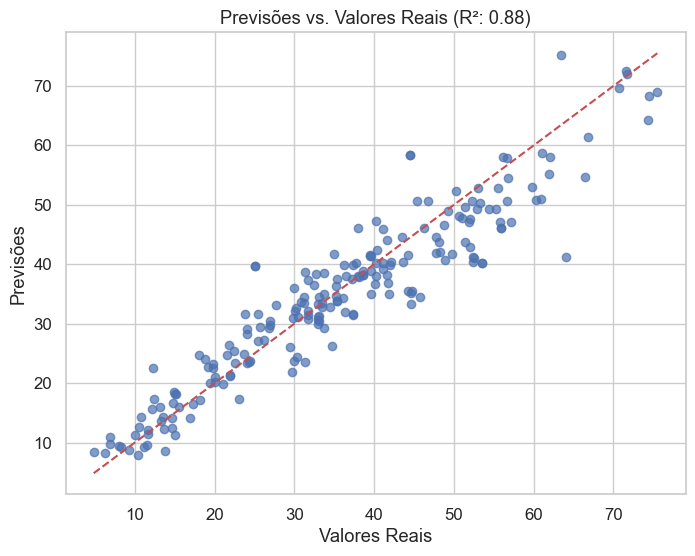

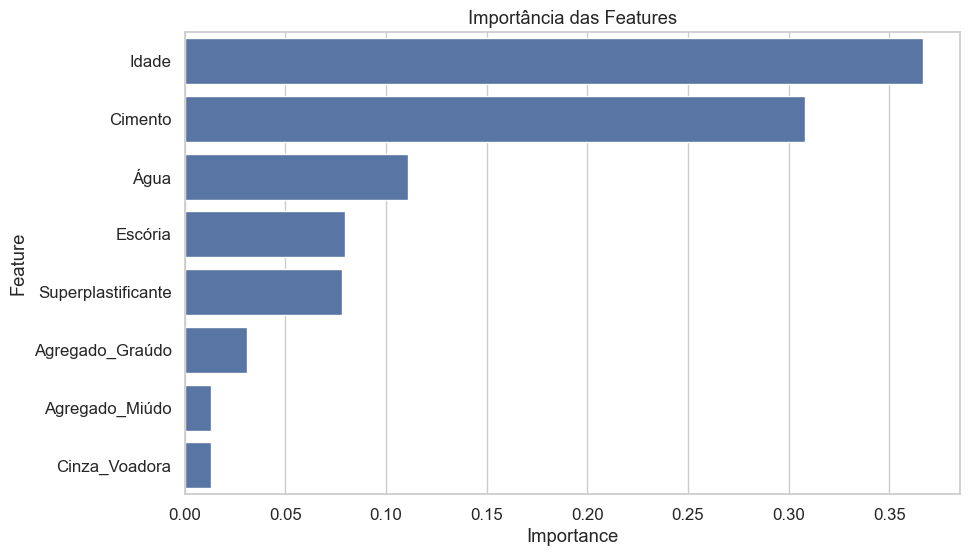

In [11]:
# Plotar previsões vs. valores reais para o melhor modelo
best_model = models['Gradient Boosting']
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title(f'Previsões vs. Valores Reais (R²: {r2:.2f})')
plt.show()

# Analisar a importância das features
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Features')
plt.show()

## Capítulo 6: Resumo Geral

<h4> Análise Exploratória de Dados: </h4>

A análise exploratória revelou a distribuição das variáveis e as correlações entre elas. Identificamos que algumas variáveis têm uma correlação significativa com a resistência do concreto.

<h4> Pré-processamento de Dados:</h4>

A normalização das features garantiu que todas as variáveis estivessem na mesma escala, o que é crucial para o desempenho dos modelos de machine learning.

<h4> Construção e Avaliação do Modelo:</h4>

Testamos três algoritmos de machine learning. O modelo de Gradient Boosting apresentou o melhor desempenho, com um MSE mais baixo e um R² mais alto.

<h4> Visualização dos Resultados:</h4>

As previsões do modelo de Gradient Boosting mostraram uma boa correspondência com os valores reais. A análise da importância das features revelou que algumas variáveis, como a quantidade de cimento e a idade do concreto, são mais influentes na previsão da resistência.

## Capítulo 7: Conclusões e Próximos Passos

Este projeto demonstrou como técnicas de machine learning podem ser aplicadas para resolver problemas reais na construção civil. O modelo de Gradient Boosting provou ser uma ferramenta poderosa para prever a resistência do concreto, oferecendo precisão e confiabilidade.

No futuro, podemos expandir este estudo para incluir mais variáveis, como condições ambientais durante a cura, e testar algoritmos mais avançados, como redes neurais. Além disso, a integração deste modelo em softwares de design estrutural pode revolucionar a forma como projetamos e construímos nossas cidades.

Moral da História: A ciência de dados e o machine learning não são apenas ferramentas tecnológicas; são aliados poderosos para enfrentar desafios do mundo real, como construir estruturas mais seguras e duráveis, otimizando recursos e tempo e minimizando riscos e desperdícios.


## Referências

- [UCI Machine Learning Repository: Concrete Compressive Strength Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)
- Documentação do [Pandas](https://pandas.pydata.org/), [Seaborn](https://seaborn.pydata.org/) e [Statsmodels](https://www.statsmodels.org/).

